In [1]:
import numpy as np
import trimesh as tri
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mesh = tri.creation.uv_sphere()

In [3]:
#sampled = tri.sample.sample_surface_even(mesh, 64*64)
#param = tri.convex.convex_hull(sampled[0])

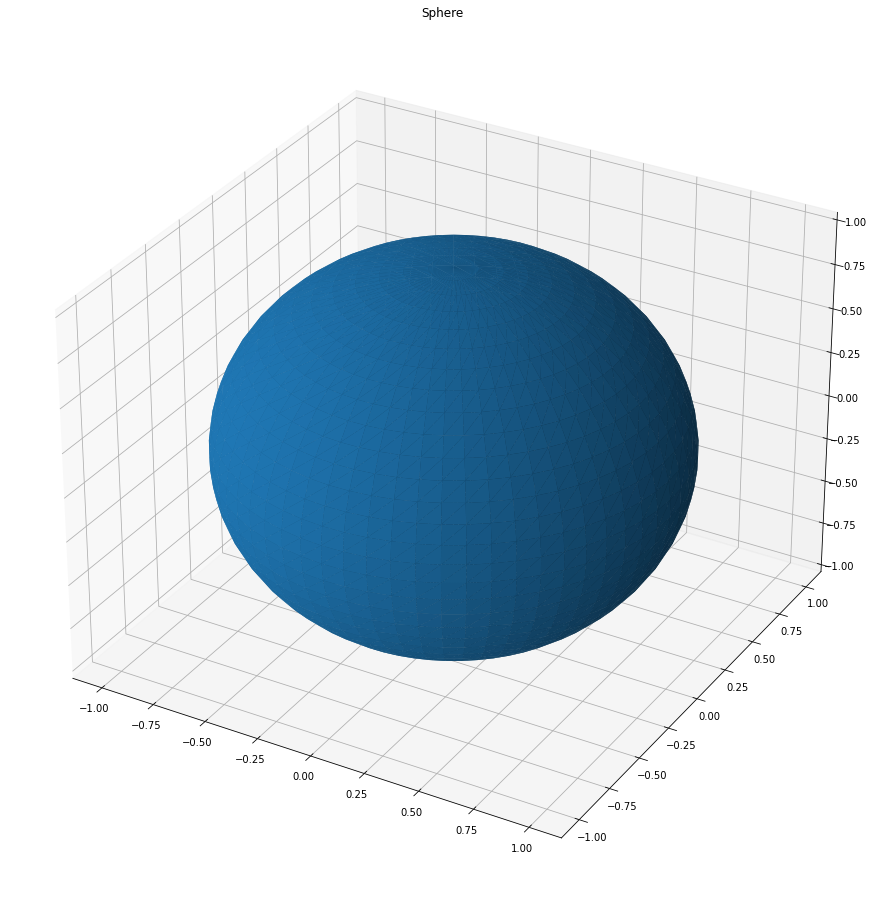

In [4]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:,1], triangles=mesh.faces, Z=mesh.vertices[:,2])
ax1.set_title("Sphere")
plt.show()

In [5]:
s_x = np.random.normal(0, 0.02, mesh.vertices[:, 0].shape[0])
s_y = np.random.normal(0, 0.02, mesh.vertices[:, 1].shape[0])
s_z = np.random.normal(0, 0.02, mesh.vertices[:, 2].shape[0])

In [6]:
x = mesh.vertices[:, 0] + s_x
y = mesh.vertices[:, 1] + s_y
z = mesh.vertices[:, 2] + s_z

In [7]:
#mesh2 = tri.Trimesh(vertices=np.array([x,y,z]).T, faces=mesh.faces)

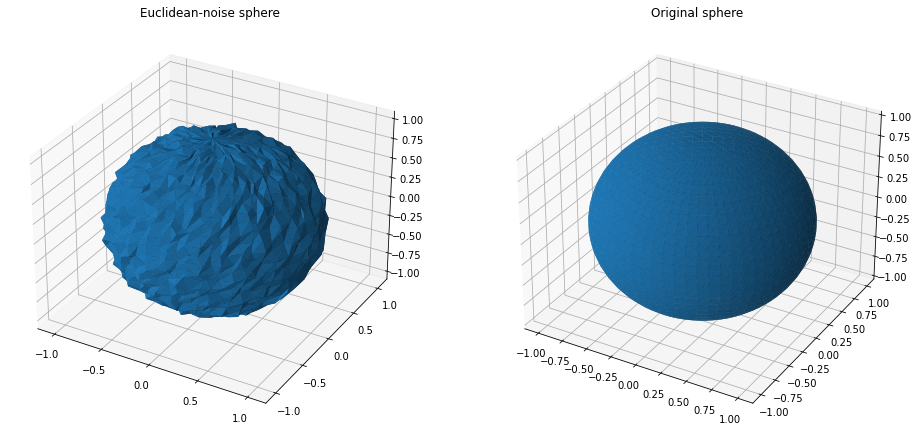

In [8]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(x, y, triangles=mesh.faces, Z=z)
ax1.set_title("Euclidean-noise sphere")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:,1], triangles=mesh.faces, Z=mesh.vertices[:,2])
ax2.set_title("Original sphere")
plt.show()

In [9]:
T = np.linspace(0,1,8)

x = mesh.vertices[:, 0]
y = mesh.vertices[:, 1]
z = mesh.vertices[:, 2]
mesh2 = tri.Trimesh(vertices = np.array([x,y,z]).T, faces = mesh.faces, process=False)

In [10]:
mesh2.vertices.shape

(2016, 3)

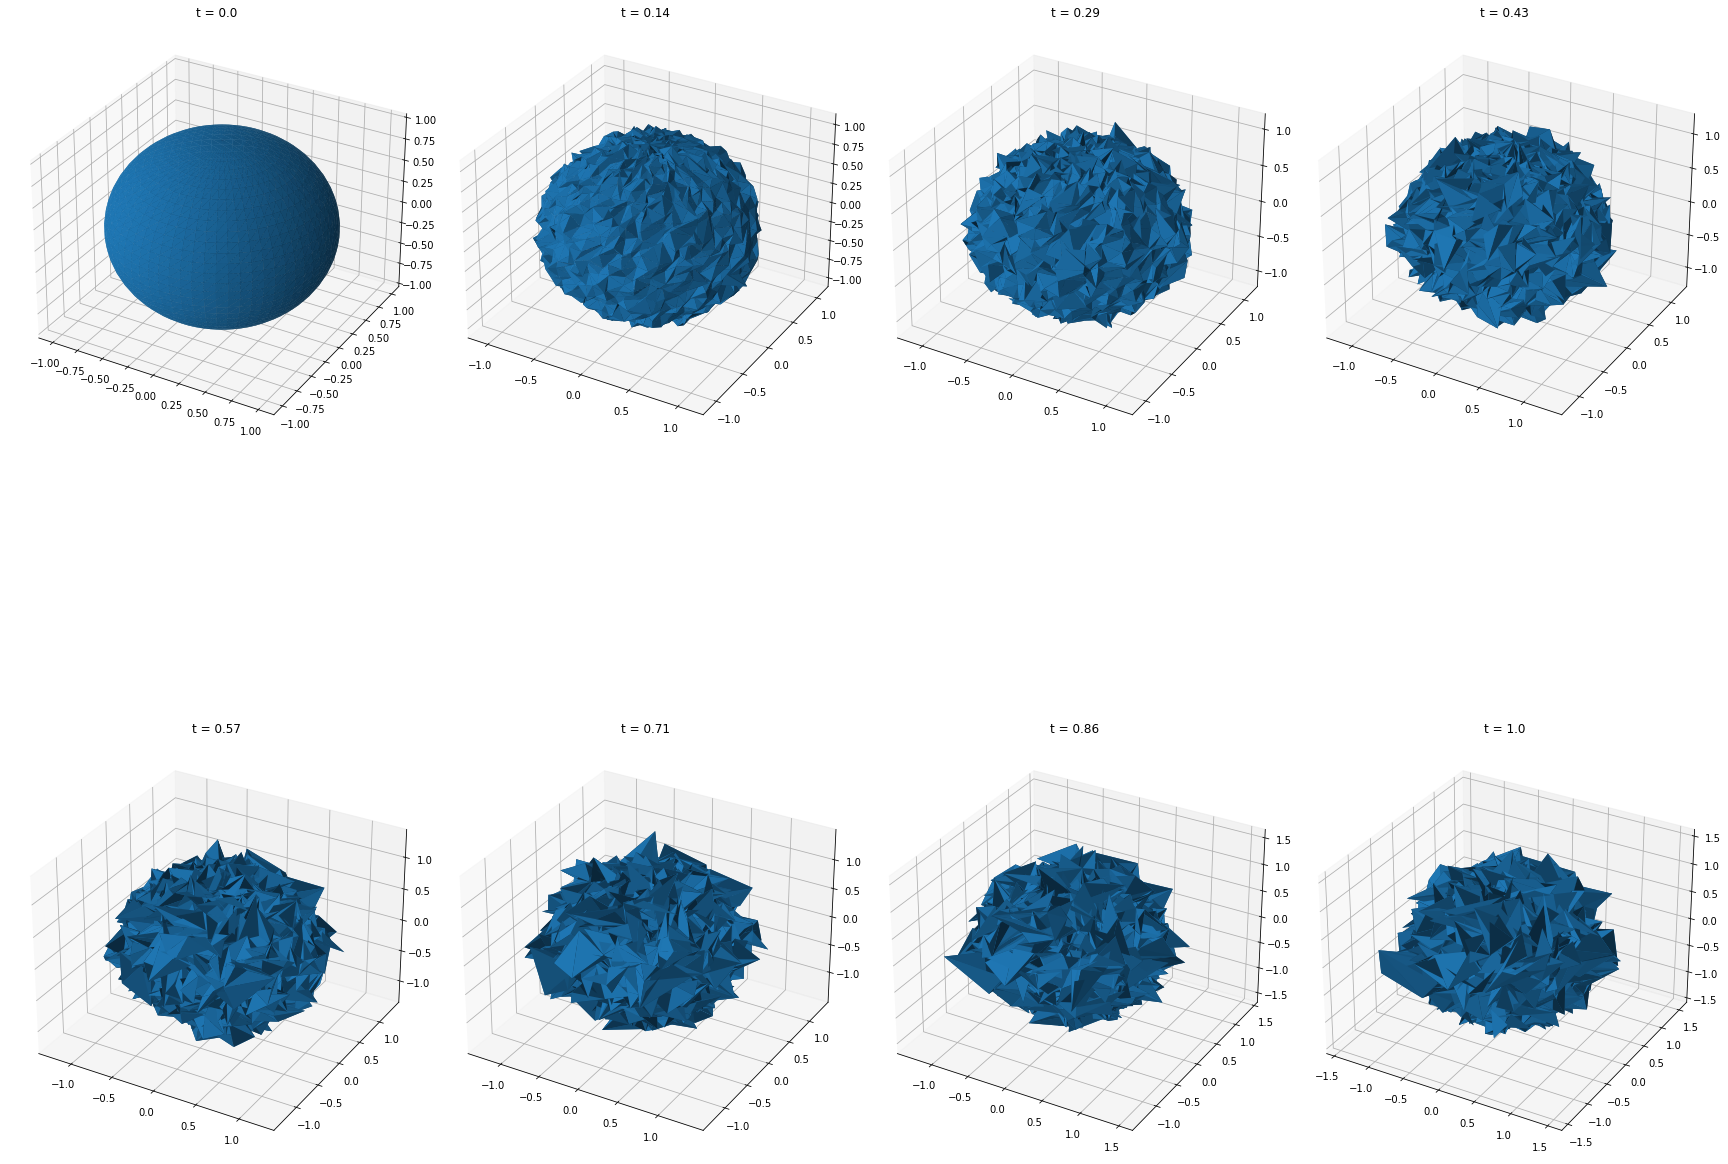

In [11]:
fig = plt.figure(figsize=(24,24))
for i,t in enumerate(T):
    s_x = np.random.normal(0, 0.1*np.sqrt(t), mesh.vertices[:, 0].shape[0])
    s_y = np.random.normal(0, 0.1*np.sqrt(t), mesh.vertices[:, 1].shape[0])
    s_z = np.random.normal(0, 0.1*np.sqrt(t), mesh.vertices[:, 2].shape[0])
    
    x = mesh2.vertices[:, 0] + s_x
    y = mesh2.vertices[:, 1] + s_y
    z = mesh2.vertices[:, 2] + s_z
    mesh2 = tri.Trimesh(vertices = np.array([x,y,z]).T, faces = mesh.faces, process=False)
    
    ax = fig.add_subplot(2,4,i+1, projection='3d')
    ax.plot_trisurf(x, y, triangles=mesh2.faces, Z=z)
    ax.set_title("t = " + str(np.round(t,2)))
    
plt.tight_layout()
plt.show()

### Noise in the direction of normals ???

In [12]:
nx, ny, nz = mesh.vertex_normals[:,0], mesh.vertex_normals[:,1], mesh.vertex_normals[:,2]
s = np.random.normal(0, np.sqrt(0.1), nx.size)
s_x = nx*s
s_y = ny*s
s_z = nz*s
x = mesh.vertices[:, 0] + s_x
y = mesh.vertices[:, 1] + s_y
z = mesh.vertices[:, 2] + s_z
mesh2 = tri.Trimesh(vertices = np.array([x,y,z]).T, faces = mesh.faces, process=False)

In [13]:
s_x

array([-1.98765428e-17,  4.78006961e-02, -1.27171240e-01, ...,
        8.51501852e-02,  5.96699948e-02,  0.00000000e+00])

In [14]:
mesh.vertex_normals

array([[-8.33171252e-17,  1.25036238e-16,  1.00000000e+00],
       [ 1.02759255e-01, -5.18425857e-18,  9.94706256e-01],
       [ 2.02840264e-01, -8.71128857e-18,  9.79211840e-01],
       ...,
       [ 2.01832306e-01, -2.01963683e-02, -9.79211840e-01],
       [ 1.02248621e-01, -1.02315178e-02, -9.94706256e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
mesh2.vertex_normals

array([[ 0.30495443, -0.16529933,  0.937912  ],
       [ 0.07579062,  0.01054246,  0.99706802],
       [ 0.22809532, -0.00731554,  0.97361132],
       ...,
       [ 0.90226347, -0.0930675 , -0.42102146],
       [ 0.16731132, -0.02738447, -0.98552373],
       [ 0.        ,  0.        ,  0.        ]])

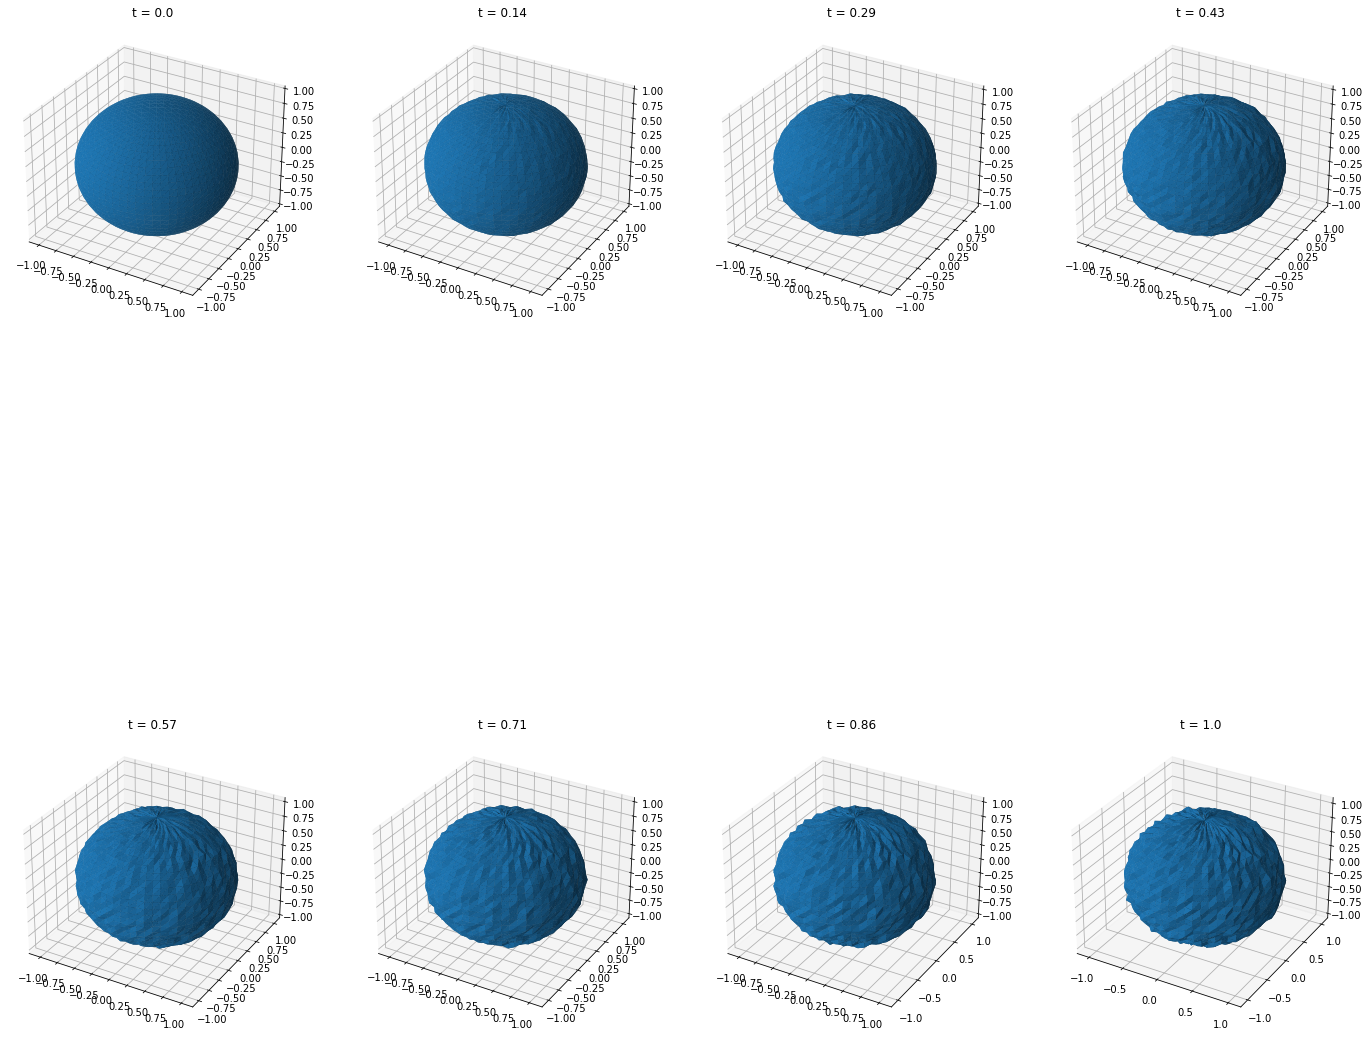

In [16]:
T = np.linspace(0,1,8)
fig = plt.figure(figsize=(24,24))
mesh2 = mesh

for i,t in enumerate(T):
    nx, ny, nz = mesh.vertex_normals[:,0], mesh.vertex_normals[:,1], mesh.vertex_normals[:,2]
    s = np.random.normal(0, 0.01*np.sqrt(t), nx.size)
    s_x = nx*s
    s_y = ny*s
    s_z = nz*s
    x = mesh2.vertices[:, 0] + s_x
    y = mesh2.vertices[:, 1] + s_y
    z = mesh2.vertices[:, 2] + s_z
    mesh2 = tri.Trimesh(vertices = np.array([x,y,z]).T, faces = mesh.faces, process=False)
    
    ax = fig.add_subplot(2,4,i+1, projection='3d')
    ax.plot_trisurf(x, y, triangles=mesh.faces, Z=z)
    ax.set_title("t = " + str(np.round(t,2)))

### Images

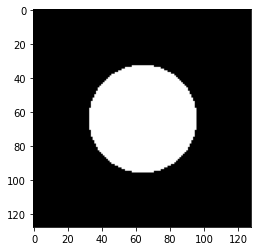

In [83]:
#img for tests
img = np.zeros((128,128))
for x in range(img.shape[0]):
    for y in range(img[x].shape[0]):
        if (x - 64)**2 + (y-64)**2 <= 1000:
            img[x,y]=255
plt.imshow(img, "gray")
plt.show()

In [84]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 2D Haar wavelets

In [20]:
def phi0(t):
    if 0 <= t < 1:
        return 1
    return 0

def psi0(t):
    if 0 <= t <(1/2):
        return 1
    elif 1/2 <= t < 1:
        return -1
    return 0

In [26]:
T = np.linspace(-1, 2, 1000)
Phi = np.array([phi0(t) for t in T])
Psi = np.array([psi0(t) for t in T])

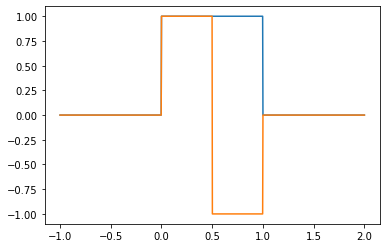

In [27]:
plt.plot(T, Phi)
plt.plot(T, Psi)
plt.show()

In [28]:
def phi(n,k, t):
    return(2**(n/2)*phi0(2**n * t - k))

def psi(n,k, t):
    return(2**(n/2)*psi0(2**n * t - k))

In [30]:
def phi2D0(x,y):
    return(phi(x)*phi(y))

def psi_H0(x,y):
    return(psi(x)*phi(y))

def psi_V0(x,y):
    return(phi(x)*psi(y))

def psi_D0(x,y):
    return(psi(x)*psi(y))

In [31]:
def phi2D(n,k,l, x, y):
    return(phi(n,k,x) * phi(n,l,y))

def psi_H(n,k,l,x,y):
    return(psi(n,k,x) * phi(n,l,y))

def psi_V(n,k,l,x,y):
    return(phi(n,k,x) * psi(n,l,y))

def psi_D(n,k,l,x,y):
    return(psi(n,k,x) * psi(n,l,y))

In [48]:
import pywt
import pywt.data

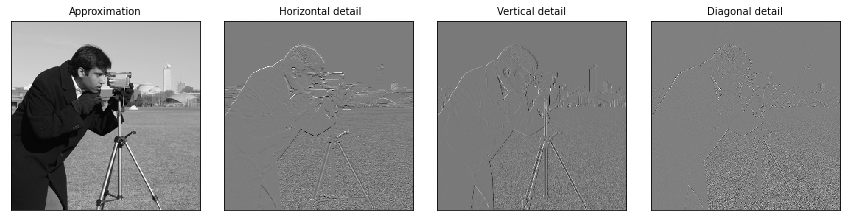

In [49]:
# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()